In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("oasis_cross-sectional.csv")

# Drop missing or invalid data
df = df.dropna(subset=['Age', 'nWBV', 'CDR'])

# Create a categorical dementia status variable
df['Dementia Status'] = df['CDR'].apply(lambda x: 'Dementia' if x > 0 else 'No Dementia')

In [3]:
#brain volume vs age by dementia status - altair

# Base scatterplot (zoomed-in y-axis)
scatter = (
    alt.Chart(df)
    .mark_circle(size=60, opacity=0.6)
    .encode(
        x=alt.X('Age:Q', title='Age (years)', scale=alt.Scale(domain=[40, 100])),
        y=alt.Y('nWBV:Q', title='Normalized Whole-Brain Volume (nWBV)', scale=alt.Scale(domain=[0.6, 0.9])),
        color=alt.Color('Dementia Status:N', title='Cognitive Group'),
        tooltip=['ID', 'Age', 'nWBV', 'CDR', 'Dementia Status']
    )
)

# Regression trend lines
trendline = (
    alt.Chart(df)
    .transform_regression('Age', 'nWBV', groupby=['Dementia Status'])
    .mark_line(size=3)
    .encode(
        x='Age:Q',
        y='nWBV:Q',
        color='Dementia Status:N'
    )
)

# Combine & make interactive
chart = (scatter + trendline).properties(
    title='Brain Volume vs Age by Dementia Status (Zoomed In)',
    width=600,
    height=400
).interactive()

chart


alt.LayerChart(...)

In [4]:
# age distribution by cognitive status - altair

# creating categorical dementia
df['dementia_status'] = df['CDR'].apply(lambda x: 'Dementia' if x > 0 else 'No Dementia')

# plotting distribution histogram
age_dist_chart = (
    alt.Chart(df)
    .mark_bar(opacity=0.7)
    .encode(
        alt.X('Age:Q', bin=alt.Bin(maxbins=30), title='Age (years)'),
        alt.Y('count()', title='Number of Participants'),
        alt.Color('dementia_status:N', title='Cognitive Status',
                  scale=alt.Scale(domain=['No Dementia', 'Dementia'],
                                  range=['#E68633', '#4477AA'])),
        tooltip=['dementia_status', 'count()']
    )
    .properties(
        title='Age Distribution by Cognitive Status (OASIS Cross-Sectional)',
        width=500,
        height=300
    )
    .interactive()
)

age_dist_chart


alt.Chart(...)

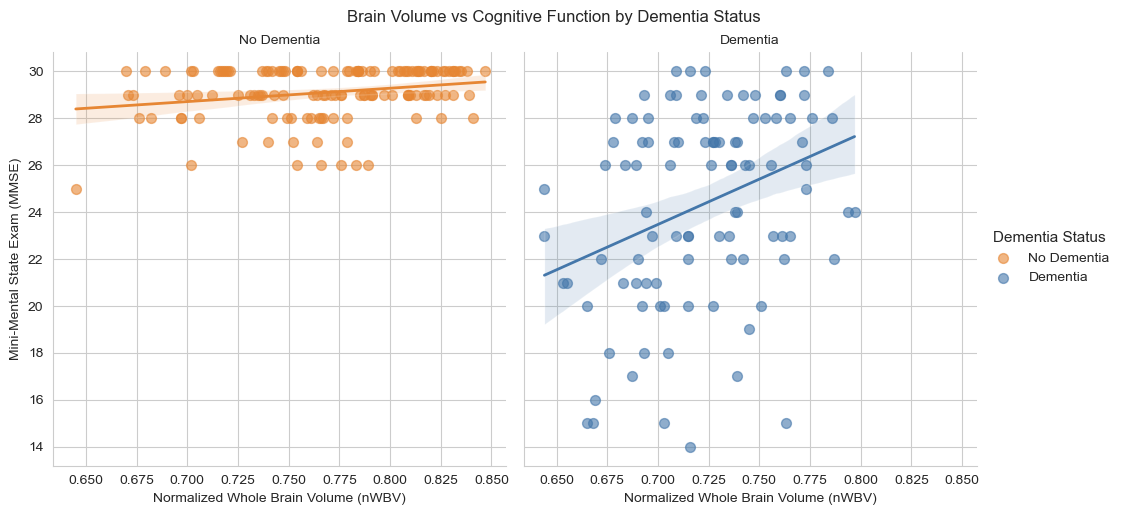

In [5]:
# brain volume vs cognitive function by dementia status

# colors
custom_palette = {
    "No Dementia": "#E68633",
    "Dementia": "#4477AA" 
}

sns.set_style("whitegrid")

# scatterplot with line
g = sns.lmplot(
    data=df,
    x="nWBV",
    y="MMSE",
    col="Dementia Status",
    hue="Dementia Status",
    palette=custom_palette,
    scatter_kws={'alpha': 0.6, 's': 50},
    line_kws={'linewidth': 2}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Normalized Whole Brain Volume (nWBV)", "Mini-Mental State Exam (MMSE)")
plt.suptitle("Brain Volume vs Cognitive Function by Dementia Status", y=1.02)


# Add a shared legend
g.add_legend(title="Dementia Status")
for text in g._legend.texts:
    text.set_fontsize(10)
g._legend.get_title().set_fontsize(11)

plt.show()

plt.show()
